In [51]:
import pandas as pd
import numpy as np
from numpy import mean
from numpy import std
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import skew
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import Lasso,LassoCV,Ridge,RidgeCV
from sklearn.ensemble import RandomForestRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.linear_model import LinearRegression
from xgboost import XGBRegressor
from sklearn import metrics
from sklearn.model_selection import LeaveOneOut
from sklearn.model_selection import cross_val_score, KFold
from sklearn.metrics import mean_squared_error


from sklearn.model_selection import train_test_split
import warnings
warnings.filterwarnings('ignore')
from statsmodels.stats.outliers_influence import variance_inflation_factor
from sklearn.model_selection import GridSearchCV as gs
import pickle

In [2]:
url='https://raw.githubusercontent.com/dsrscientist/Data-Science-ML-Capstone-Projects/master/baseball.csv'
baseball_dataset=pd.read_csv(url)

In [3]:
baseball_dataset.shape

(30, 17)

DataSet is extremely small in size 

In [4]:
pd.set_option('display.max_rows', None)
baseball_dataset.head()

,W,R,AB,H,2B,3B,HR,BB,SO,SB,RA,ER,ERA,CG,SHO,SV,E
0,95,724,5575,1497,300,42,139,383,973,104,641,601,3.73,2,8,56,88
1,83,696,5467,1349,277,44,156,439,1264,70,700,653,4.07,2,12,45,86
2,81,669,5439,1395,303,29,141,533,1157,86,640,584,3.67,11,10,38,79
3,76,622,5533,1381,260,27,136,404,1231,68,701,643,3.98,7,9,37,101
4,74,689,5605,1515,289,49,151,455,1259,83,803,746,4.64,7,12,35,86


Indication and explanation of each column:
1.  W   - number of Wins for the season  by the team 
2.  R   - Total runs scored by the team
3.  AB  - At bat (AB) or time at bat is a batter's turn batting against a pitcher.
4.  H   - Hits: when a batter strikes the baseball into fair territory and reaches base without doing
5.  2B  - Double: double is the act of a batter striking the pitched ball and safely reaching second base without being called out by the umpire, without the benefit of a fielder's misplay.
6.  3B  - Triple: triple is the act of a batter safely reaching third base after hitting the ball, with neither the benefit of a fielder's misplay.
7.  HR  - HomeRun: home run occurs when a batter hits a fair ball and scores on the play without being put out or without the benefit of an error.
8.  BB  - Walk (or base on balls) occurs when a pitcher throws four pitches out of the strike zone, none of which are swung at by the hitter.
9.  SO  - Strike-out: It occurs when a batter accrues three strikes during a time at bat. It usually means the batter is out.
10. SB  - Stolen base occurs when a runner advances to a base to which he is not entitled and the official scorer rules that the advance should be credited to the action of the runner.
11. RA  - Runs Allowed is the amount of runs that score against a pitcher. This includes earned runs and unearned runs.
12. ER  - An earned run is any run that scores against a pitcher without the benefit of an error or a passed ball.
13. ERA - Earned run average represents the number of earned runs a pitcher allows per nine innings
14. CG  - Complete game :A pitcher earns a complete game if he pitches the entire game for his team regardless of how long it lasts.
15. SHO - A starting pitcher is credited with a shutout when he pitches the entire game for a team and does not allow the opposition to score.
16. SV  - A save is awarded to the relief pitcher who finishes a game for the winning team, under certain circumstances. A pitcher cannot receive a save and a win in the same game.
17. E   - the number of errors awarded to the defense during the duration of the game.

Number of Wins is our Target and remaining all are features.

What we can draw out from the above explanation of each column:
1. More the runs scored by the team more their is a chance that the particular team has more wins
2. At bats doesn't conclude must other than that the batter is at home plate to face the pitcher
3. A hit mostly doesn't matter unless the batter move to the next base.
4. Double and Triple too doesn't cause effect the win as it does count as a run.
5. Homerun is directly proportional to the number of wins as more the homeruns more will the runs so more likely to more wins
6. Walk and Stolen Base doesn't effect the scored board unless a run is scored
7. Strike Out can effect the game outcome as more 3 strikes an inning ends the inning so it has some weightage
8. Run Allowed should less for a team to have more wins
9. earned runs are legal runs so it effects the win but it is already included in the run as far as it is defined as
10. Having a high ERA does favour the win 
11. Shoutout directly says that team will win 
12. Error should be minimum for a team win as it gift the opponent runs

In [5]:
#checking datatype of the columns
baseball_dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30 entries, 0 to 29
Data columns (total 17 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   W       30 non-null     int64  
 1   R       30 non-null     int64  
 2   AB      30 non-null     int64  
 3   H       30 non-null     int64  
 4   2B      30 non-null     int64  
 5   3B      30 non-null     int64  
 6   HR      30 non-null     int64  
 7   BB      30 non-null     int64  
 8   SO      30 non-null     int64  
 9   SB      30 non-null     int64  
 10  RA      30 non-null     int64  
 11  ER      30 non-null     int64  
 12  ERA     30 non-null     float64
 13  CG      30 non-null     int64  
 14  SHO     30 non-null     int64  
 15  SV      30 non-null     int64  
 16  E       30 non-null     int64  
dtypes: float64(1), int64(16)
memory usage: 4.1 KB


In [6]:
#checking null values in dataset
baseball_dataset.isnull().sum()

W      0
R      0
AB     0
H      0
2B     0
3B     0
HR     0
BB     0
SO     0
SB     0
RA     0
ER     0
ERA    0
CG     0
SHO    0
SV     0
E      0
dtype: int64

Obversations:
1. Zero nullvalues in the dataset
2. All are numerical data

In [7]:
baseball_dataset.describe()

,W,R,AB,H,2B,3B,HR,BB,SO,SB,RA,ER,ERA,CG,SHO,SV,E
count,30.000000,30.000000,30.000000,30.000000,30.000000,30.000000,30.000000,30.000000,30.00000,30.000000,30.000000,30.000000,30.000000,30.000000,30.000000,30.000000,30.000000
mean,80.966667,688.233333,5516.266667,1403.533333,274.733333,31.300000,163.633333,469.100000,1248.20000,83.500000,688.233333,635.833333,3.956333,3.466667,11.300000,43.066667,94.333333
std,10.453455,58.761754,70.467372,57.140923,18.095405,10.452355,31.823309,57.053725,103.75947,22.815225,72.108005,70.140786,0.454089,2.763473,4.120177,7.869335,13.958889
min,63.000000,573.000000,5385.000000,1324.000000,236.000000,13.000000,100.000000,375.000000,973.00000,44.000000,525.000000,478.000000,2.940000,0.000000,4.000000,28.000000,75.000000
25%,74.000000,651.250000,5464.000000,1363.000000,262.250000,23.000000,140.250000,428.250000,1157.50000,69.000000,636.250000,587.250000,3.682500,1.000000,9.000000,37.250000,86.000000
50%,81.000000,689.000000,5510.000000,1382.500000,275.500000,31.000000,158.500000,473.000000,1261.50000,83.500000,695.500000,644.500000,4.025000,3.000000,12.000000,42.000000,91.000000
75%,87.750000,718.250000,5570.000000,1451.500000,288.750000,39.000000,177.000000,501.250000,1311.50000,96.500000,732.500000,679.250000,4.220000,5.750000,13.000000,46.750000,96.750000
max,100.000000,891.000000,5649.000000,1515.000000,308.000000,49.000000,232.000000,570.000000,1518.00000,134.000000,844.000000,799.000000,5.040000,11.000000,21.000000,62.000000,126.000000


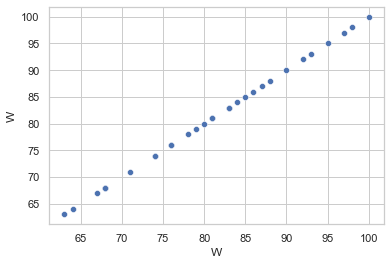

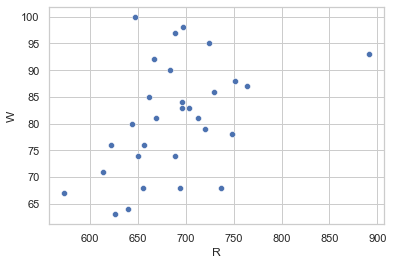

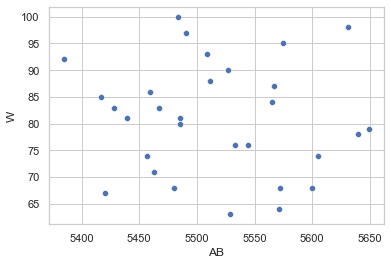

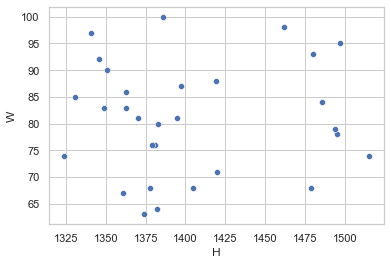

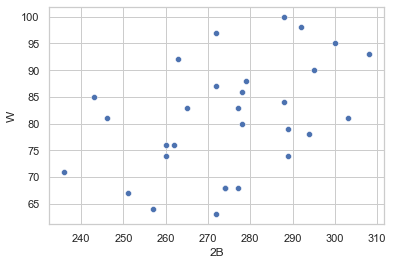

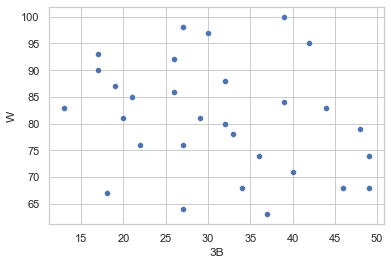

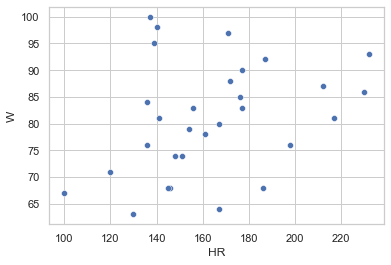

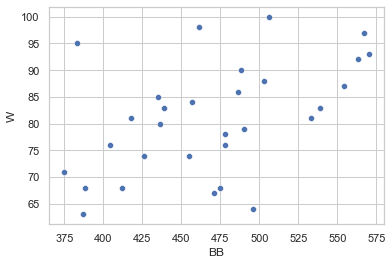

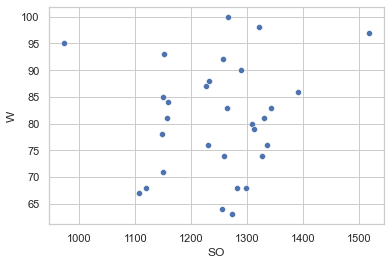

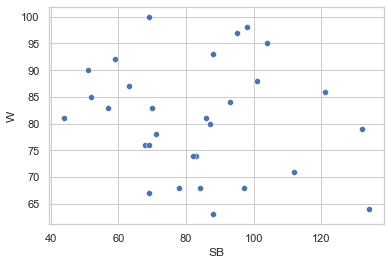

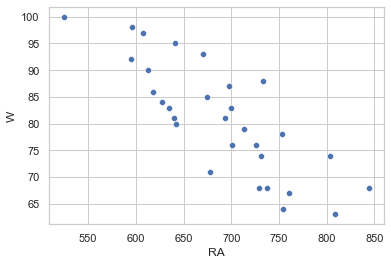

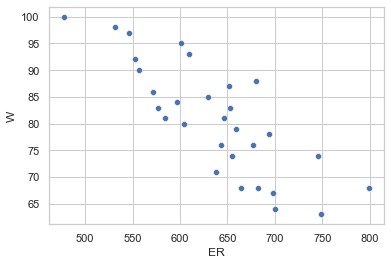

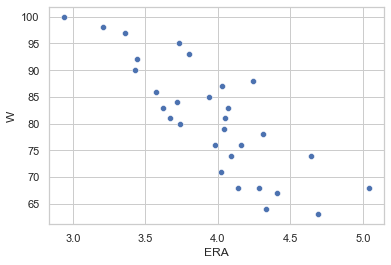

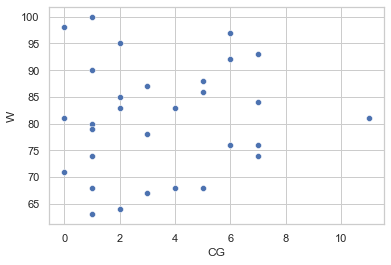

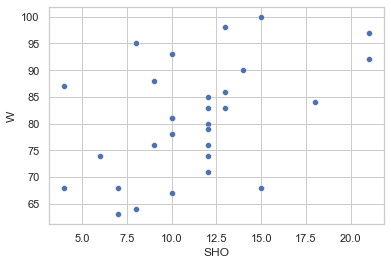

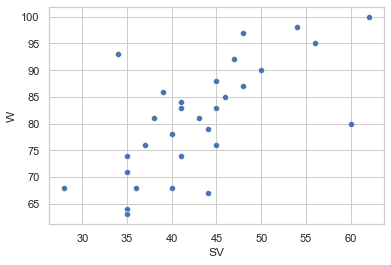

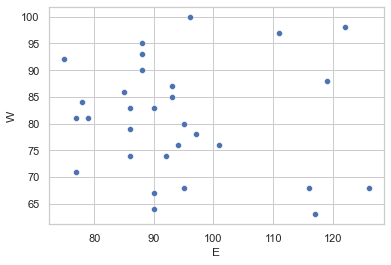

In [8]:
for i in baseball_dataset:
    sns.set(style='whitegrid')
    sns.scatterplot(x=i,y="W",data=baseball_dataset)
    plt.show()

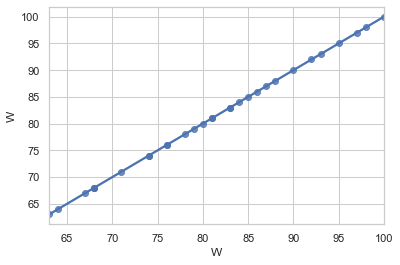

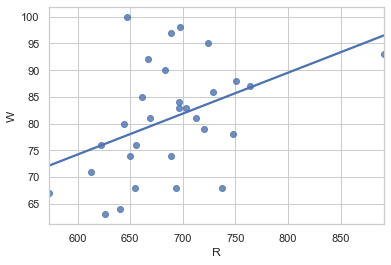

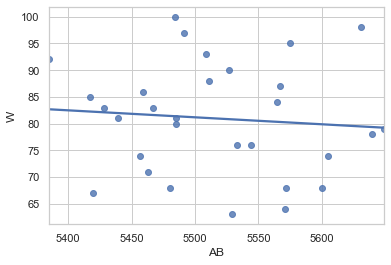

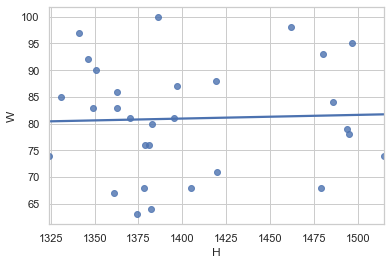

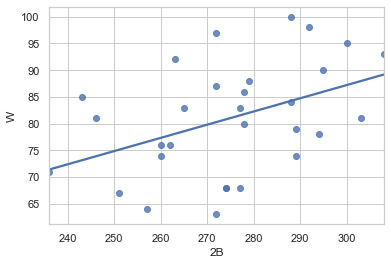

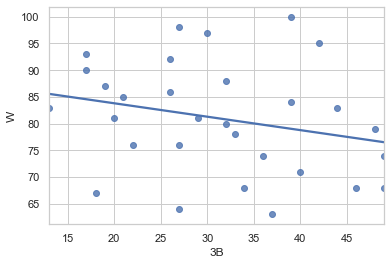

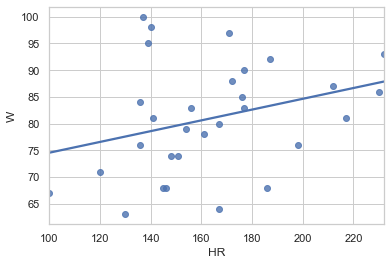

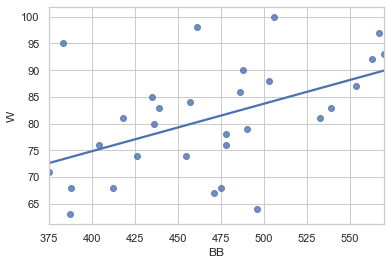

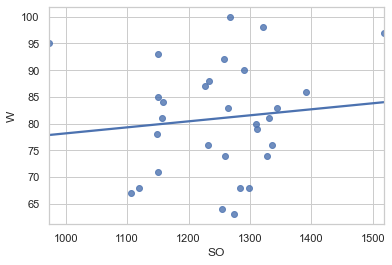

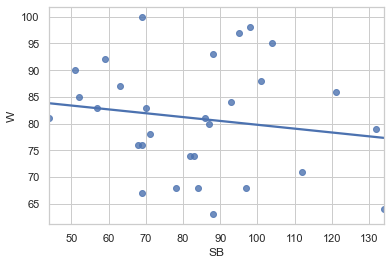

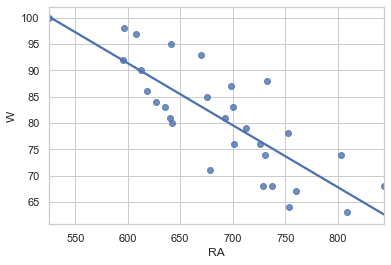

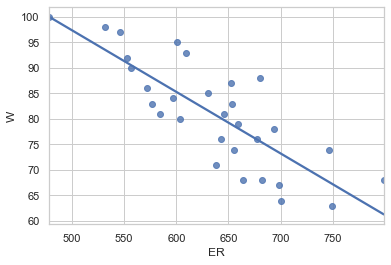

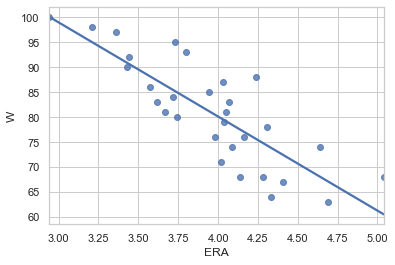

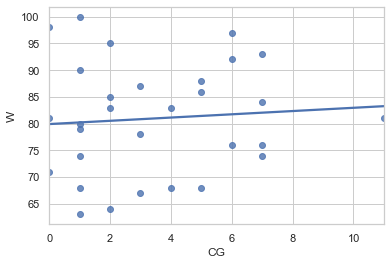

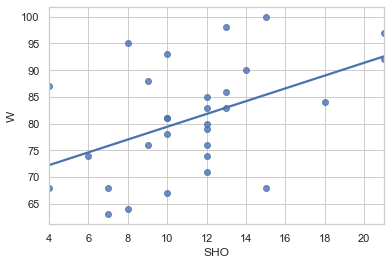

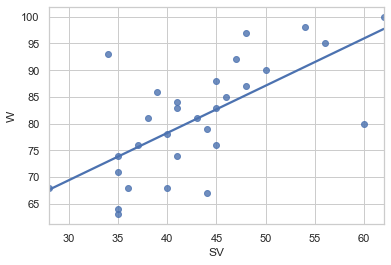

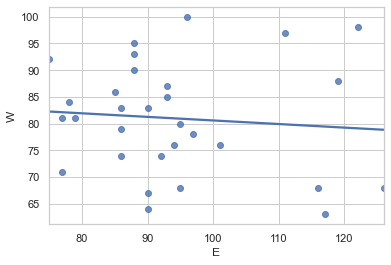

In [9]:
for j in baseball_dataset:
    sns.set(style='whitegrid')
    sns.regplot(x = j, y = "W", ci = None, data = baseball_dataset)
    plt.show()


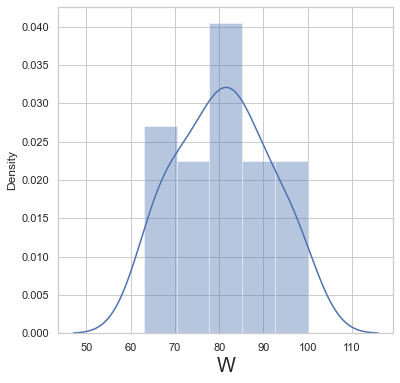

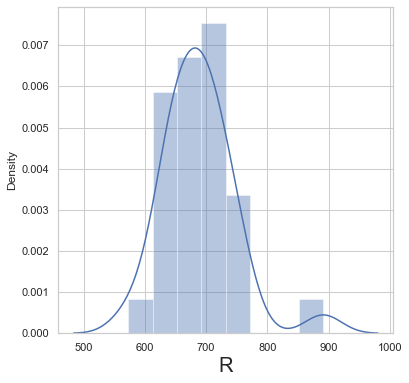

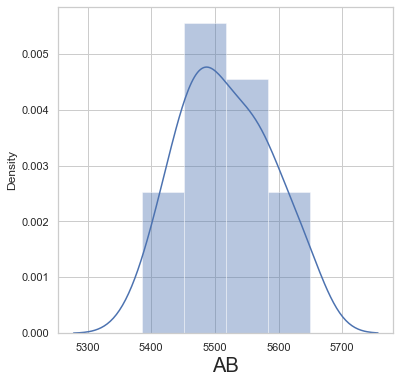

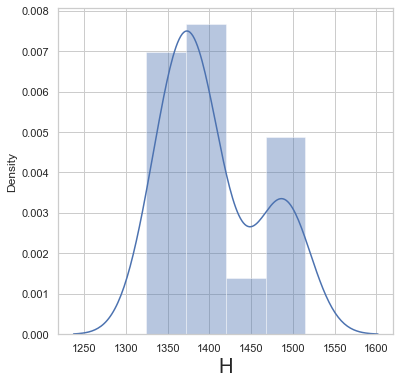

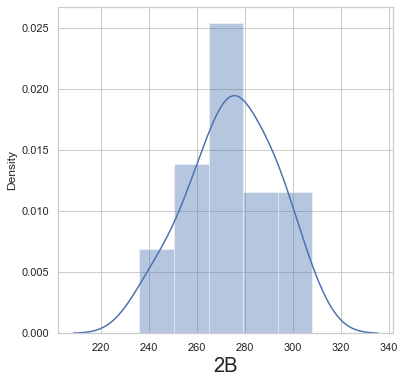

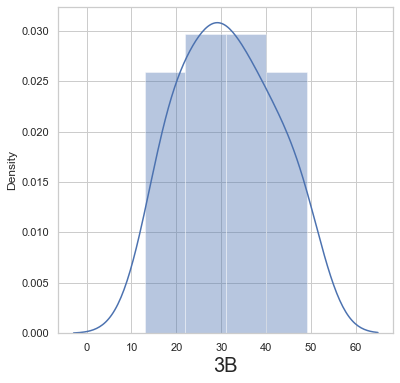

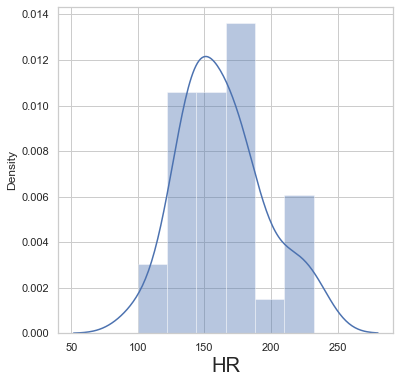

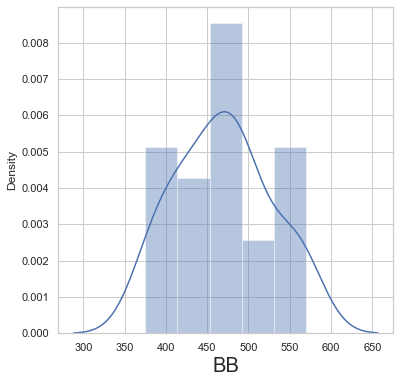

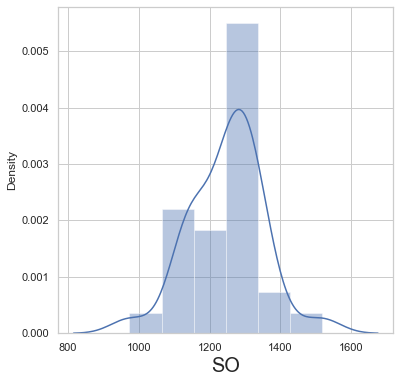

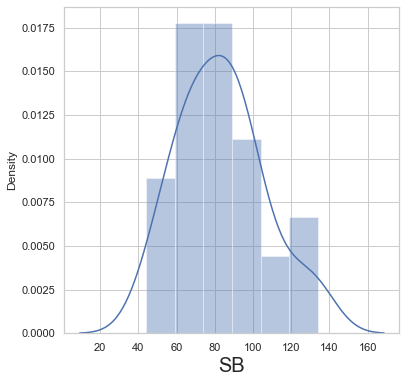

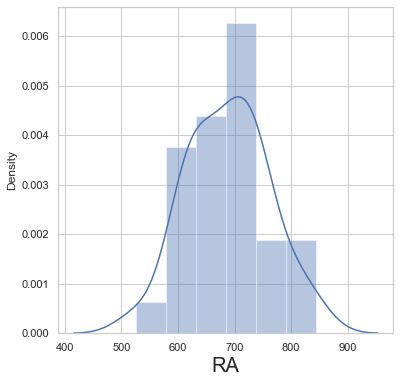

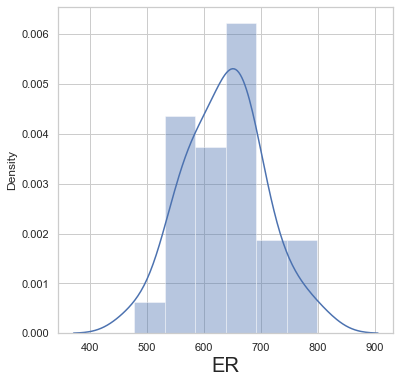

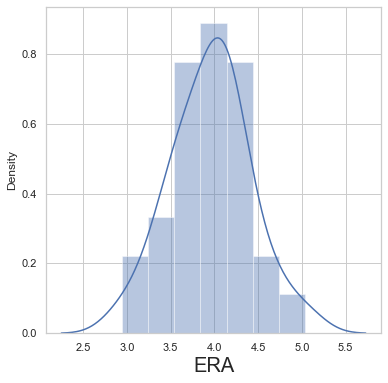

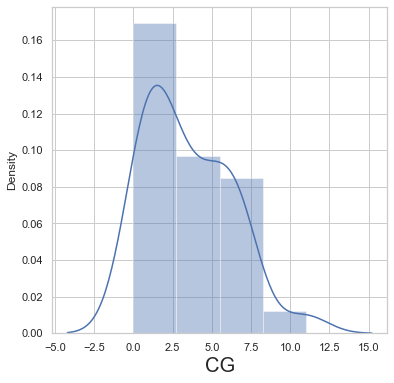

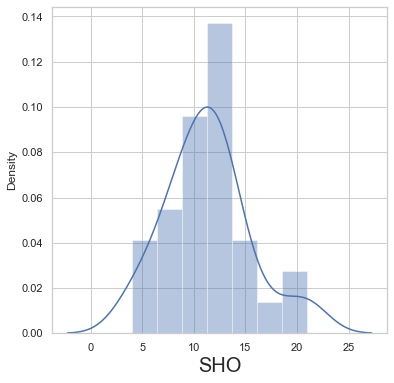

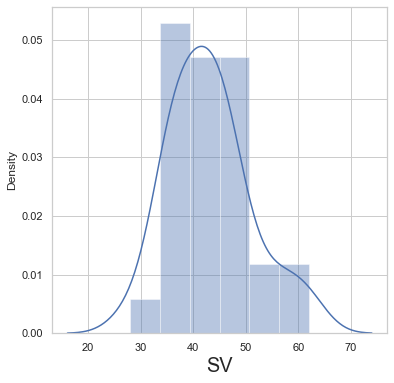

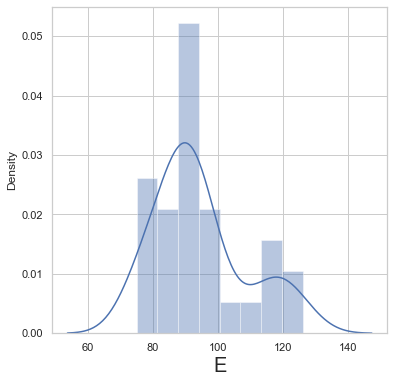

In [10]:
for column in baseball_dataset:
    plt.figure(figsize=(6,6))
    sns.distplot(baseball_dataset[column])
    plt.xlabel(column,fontsize=20)
    plt.show()

0.04470076997798572


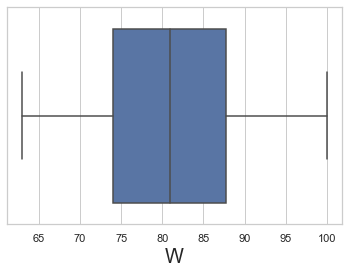

1.1398931660307043


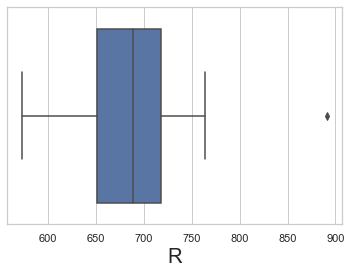

0.17413429032352498


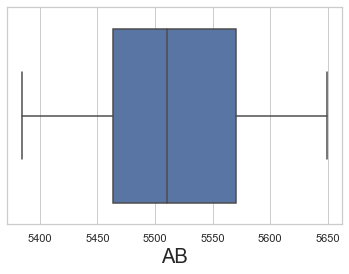

0.6362644174348592


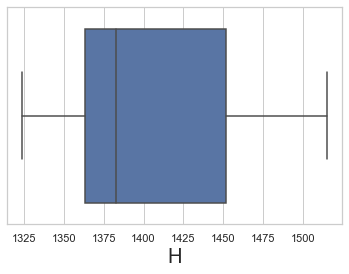

-0.2189534077067715


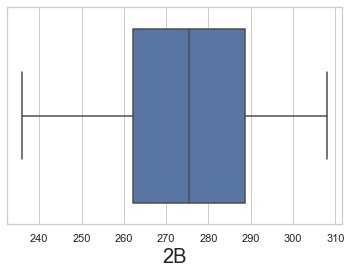

0.12293523975827839


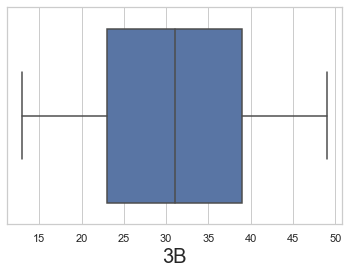

0.49025146140832154


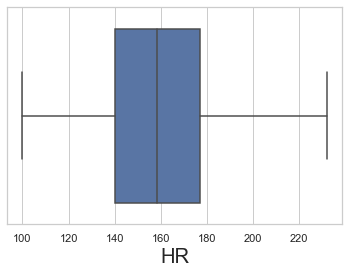

0.15046085271433388


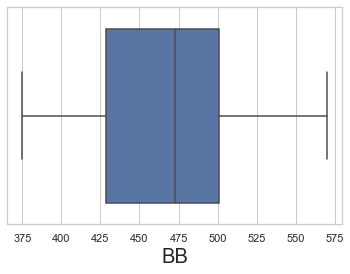

-0.14815122992357777


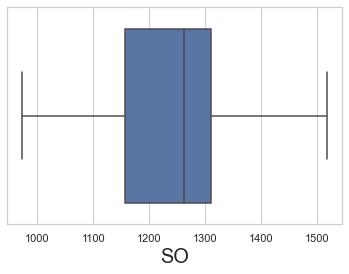

0.4555569751737513


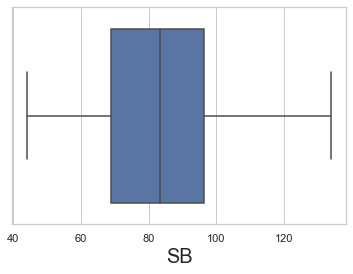

0.04341475534967941


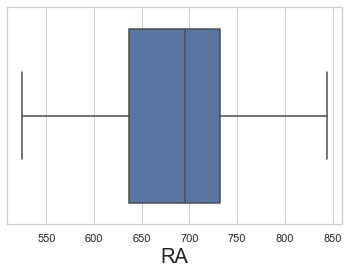

0.055732557686200515


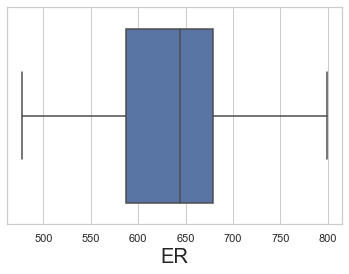

0.0506268488741678


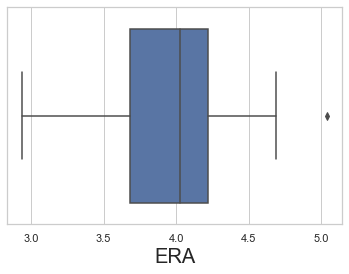

0.6994790420153237


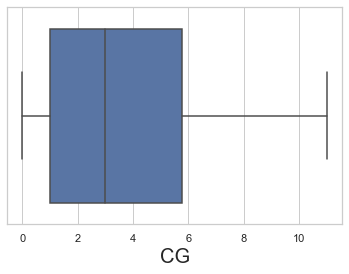

0.5370985776239573


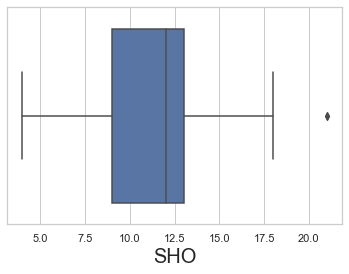

0.6241798071870271


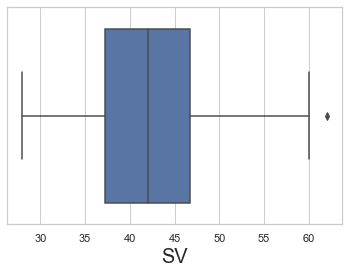

0.8449922672006391


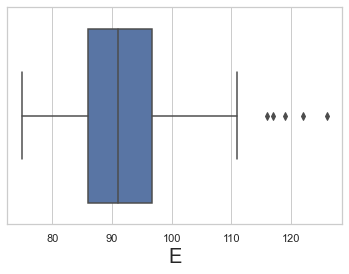

In [11]:
for col in baseball_dataset:
    print(skew(baseball_dataset[col]))
    plt.figure()
    sns.boxplot(baseball_dataset[col])
    plt.xlabel(col,fontsize=20)
    plt.show()

It can be observed that Runs(R), earned runs average(ERA), Shoutout(SHO), Saves(SV), and Errors(E) have few outliers, can't use mean imputation or remove them as it can make our biased and even more small respectively

In [12]:
#arresting the outliers using IQR method
#R
Q1=baseball_dataset['R'].quantile(0.25)
Q3=baseball_dataset['R'].quantile(0.75)
IQR_R=Q3-Q1
whisker_width = 1.5
news_outliers = baseball_dataset[(baseball_dataset['R'] < Q1 - whisker_width*IQR_R) | (baseball_dataset['R'] > Q3 + whisker_width*IQR_R)]
lower_whisker = Q1 -(whisker_width*IQR_R)
upper_whisker = Q3 + (whisker_width*IQR_R)
baseball_dataset['R']=np.where(baseball_dataset['R']>upper_whisker,upper_whisker,np.where(baseball_dataset['R']<lower_whisker,lower_whisker,baseball_dataset['R']))

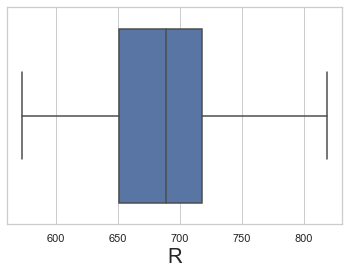

In [13]:
plt.figure()
sns.boxplot(baseball_dataset['R'])
plt.xlabel(baseball_dataset.columns[1],fontsize=20)
plt.show()

In [14]:
#arresting the outliers using IQR method
#ERA
Q1=baseball_dataset['ERA'].quantile(0.25)
Q3=baseball_dataset['ERA'].quantile(0.75)
IQR_ERA=Q3-Q1
whisker_width = 1.5
news_outliers = baseball_dataset[(baseball_dataset['ERA'] < Q1 - whisker_width*IQR_ERA) | (baseball_dataset['ERA'] > Q3 + whisker_width*IQR_ERA)]
lower_whisker = Q1 -(whisker_width*IQR_ERA)
upper_whisker = Q3 + (whisker_width*IQR_ERA)
baseball_dataset['ERA']=np.where(baseball_dataset['ERA']>upper_whisker,upper_whisker,np.where(baseball_dataset['ERA']<lower_whisker,lower_whisker,baseball_dataset['ERA']))

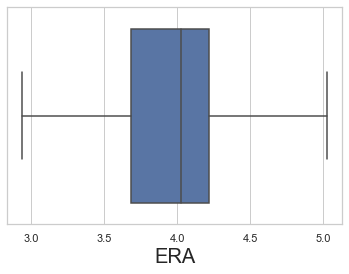

In [15]:
plt.figure()
sns.boxplot(baseball_dataset['ERA'])
plt.xlabel(baseball_dataset.columns[12],fontsize=20)
plt.show()

In [16]:
#arresting the outliers using IQR method
#SHO
Q1=baseball_dataset['SHO'].quantile(0.25)
Q3=baseball_dataset['SHO'].quantile(0.75)
IQR_SHO=Q3-Q1
whisker_width = 1.5
news_outliers = baseball_dataset[(baseball_dataset['SHO'] < Q1 - whisker_width*IQR_SHO) | (baseball_dataset['SHO'] > Q3 + whisker_width*IQR_SHO)]
lower_whisker = Q1 -(whisker_width*IQR_SHO)
upper_whisker = Q3 + (whisker_width*IQR_SHO)
baseball_dataset['SHO']=np.where(baseball_dataset['SHO']>upper_whisker,upper_whisker,np.where(baseball_dataset['SHO']<lower_whisker,lower_whisker,baseball_dataset['SHO']))

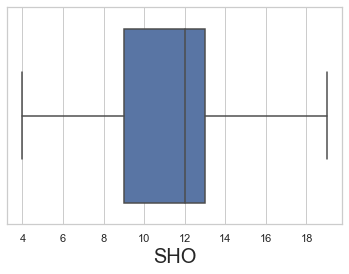

In [17]:
plt.figure()
sns.boxplot(baseball_dataset['SHO'])
plt.xlabel(baseball_dataset.columns[14],fontsize=20)
plt.show()

In [18]:
#arresting the outliers using IQR method
#SV
Q1=baseball_dataset['SV'].quantile(0.25)
Q3=baseball_dataset['SV'].quantile(0.75)
IQR_SV=Q3-Q1
whisker_width = 1.5
news_outliers = baseball_dataset[(baseball_dataset['SV'] < Q1 - whisker_width*IQR_SV) | (baseball_dataset['SV'] > Q3 + whisker_width*IQR_SV)]
lower_whisker = Q1 -(whisker_width*IQR_SV)
upper_whisker = Q3 + (whisker_width*IQR_SV)
baseball_dataset['SV']=np.where(baseball_dataset['SV']>upper_whisker,upper_whisker,np.where(baseball_dataset['SV']<lower_whisker,lower_whisker,baseball_dataset['SV']))

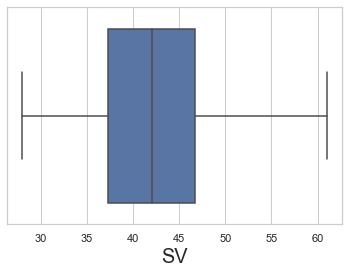

In [19]:
plt.figure()
sns.boxplot(baseball_dataset['SV'])
plt.xlabel(baseball_dataset.columns[15],fontsize=20)
plt.show()

In [20]:
#arresting the outliers using IQR method
#E
Q1=baseball_dataset['E'].quantile(0.25)
Q3=baseball_dataset['E'].quantile(0.75)
IQR_E=Q3-Q1
whisker_width = 1.5
news_outliers = baseball_dataset[(baseball_dataset['E'] < Q1 - whisker_width*IQR_E) | (baseball_dataset['E'] > Q3 + whisker_width*IQR_E)]
lower_whisker = Q1 -(whisker_width*IQR_E)
upper_whisker = Q3 + (whisker_width*IQR_E)
baseball_dataset['E']=np.where(baseball_dataset['E']>upper_whisker,upper_whisker,np.where(baseball_dataset['E']<lower_whisker,lower_whisker,baseball_dataset['E']))

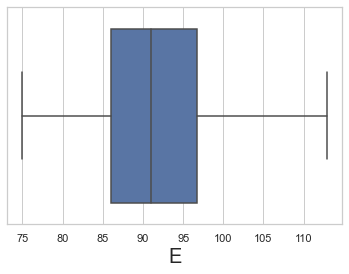

In [21]:
plt.figure()
sns.boxplot(baseball_dataset['E'])
plt.xlabel(baseball_dataset.columns[16],fontsize=20)
plt.show()

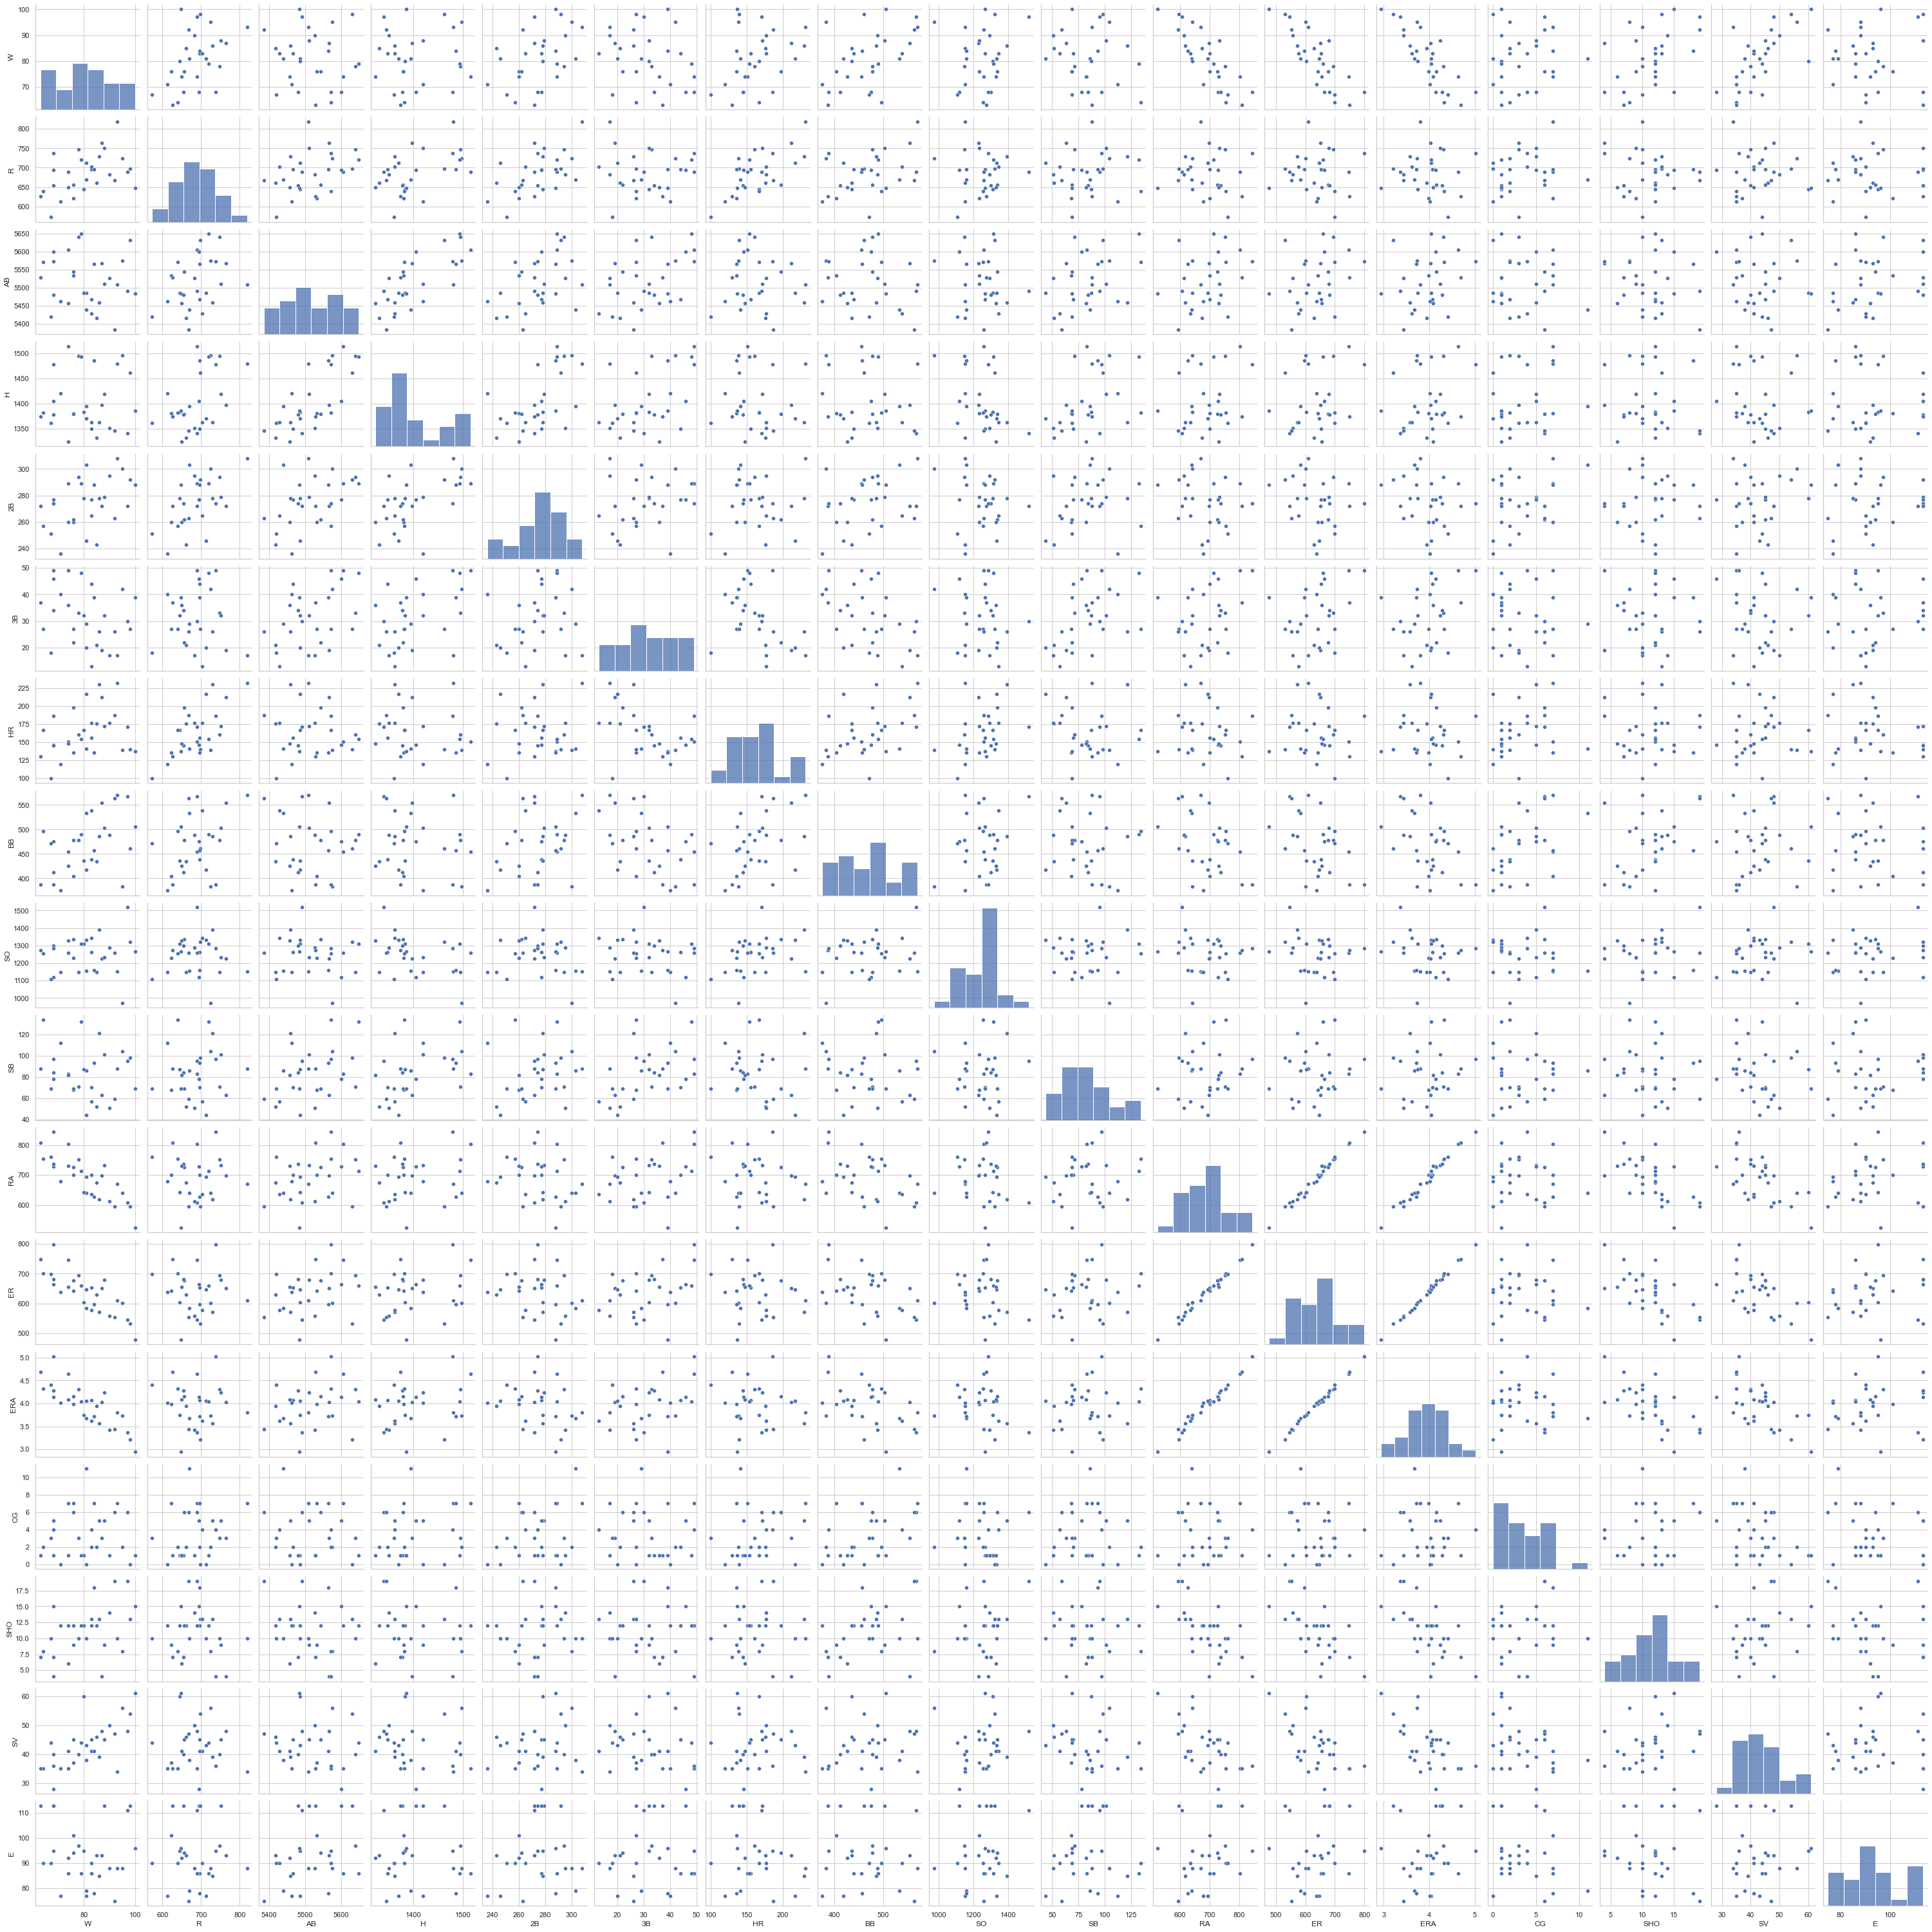

In [22]:
#pair plot for for every column in our dataset
sns.pairplot(baseball_dataset)

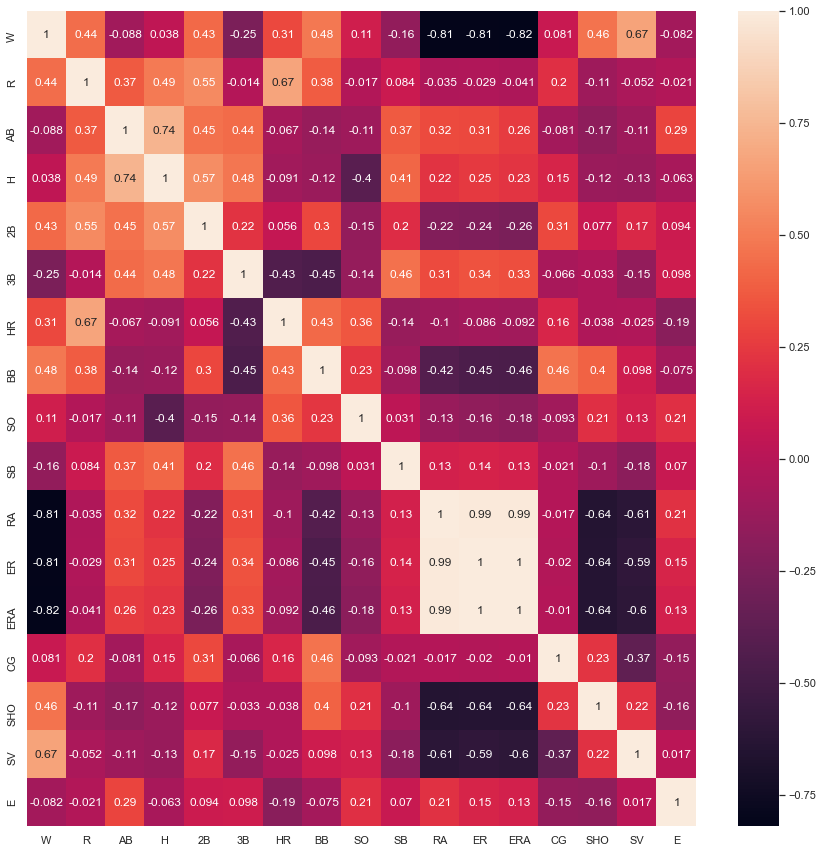

In [23]:
plt.figure(figsize=(15,15))
sns.heatmap(baseball_dataset.corr(), annot=True)
plt.show()

There is multi-collinearity problem in our features i.e between EA, ER and ERA as we can see from the heatmap let's check VIF to confirm it

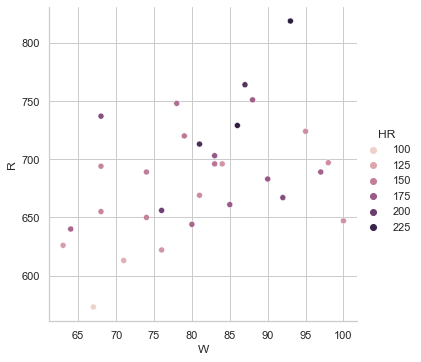

In [24]:
sns.relplot(x='W',y='R',hue='HR', data=baseball_dataset)

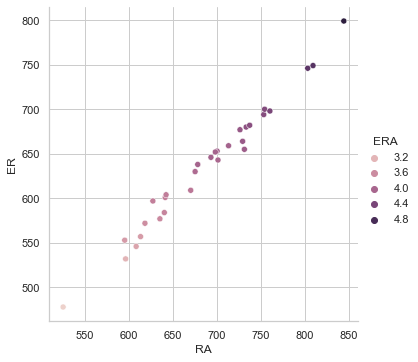

In [25]:
sns.relplot(x='RA',y='ER',hue='ERA', data=baseball_dataset)

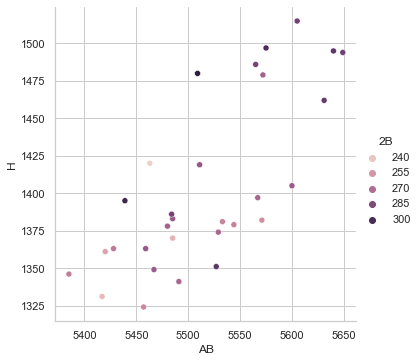

In [26]:
sns.relplot(x='AB',y='H',hue='2B', data=baseball_dataset)

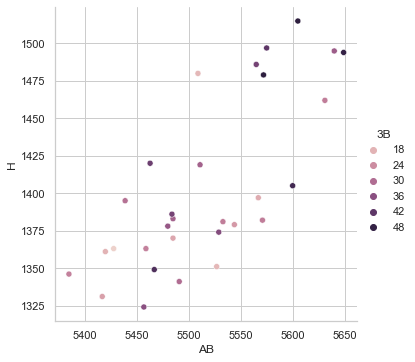

In [27]:
sns.relplot(x='AB',y='H',hue='3B', data=baseball_dataset)

Obsersvations from the above relplot graphs:
1. Runs and Homeruns have some co-relativity but not that high.
2. RA, ERA, ER are very co-related
3. AB, H, 2B, 3B are also highly corelated
4. Lets confirm by checking the VIF

In [28]:
X=baseball_dataset.drop(columns=['W'])
Y=baseball_dataset['W']

In [29]:
scalar= StandardScaler()
X_scaled= scalar.fit_transform(X)

In [30]:
X_scaled

array([[ 0.75905161,  0.84773126,  1.66368512,  1.42017307,  1.04119304,
        -0.7872986 , -1.53490242, -2.69762957,  0.91388329, -0.66623393,
        -0.50511008, -0.50718622, -0.5398062 , -0.84415269,  1.69340239,
        -0.44746715],
       [ 0.20231435, -0.71109353, -0.97068076,  0.12740339,  1.23580856,
        -0.24396668, -0.5365919 ,  0.15487844, -0.60182558,  0.16597077,
         0.24892985,  0.25625955, -0.5398062 ,  0.22214544,  0.25683995,
        -0.6213815 ],
       [-0.33453945, -1.1152333 , -0.15189137,  1.58879521, -0.22380785,
        -0.7233772 ,  1.13914361, -0.89398189,  0.11144918, -0.68033909,
        -0.75162313, -0.64191194,  2.77264091, -0.31100362, -0.65733615,
        -1.23008175],
       [-1.26906272,  0.24152162, -0.40108814, -0.82812203, -0.41842337,
        -0.8831807 , -1.16053598, -0.16860185, -0.69098493,  0.18007593,
         0.10392217,  0.05417097,  1.3004422 , -0.57757816, -0.78793273,
         0.68297617],
       [ 0.06313003,  1.28073815,  1

In [31]:
#checking VIF value 
vif_data = pd.DataFrame()
vif_data["feature"] = X.columns

vif_data["VIF"] = [variance_inflation_factor(X_scaled, i) for i in range(X_scaled.shape[1])]
  
vif_data

,feature,VIF
0,R,9.511740
1,AB,13.981196
2,H,7.884185
3,2B,3.738854
4,3B,3.432104
5,HR,8.975433
6,BB,3.725185
7,SO,2.490222
8,SB,2.112242
9,RA,188.635055


Observation from VIF and Heatmap:
1. by looking at the both corelation heatmap and vif table we can concluded that RA, ER, ERA are high co-related (have to pick one and drop the other two)
2. At Bats and Hits are also corelated 
3. Homeruns and Runs are high corelated one must be dropped
4. Saves (SV) has high VIF but in corr heatmap it doesn't have high corelation with any feature .

Feature Selection:
1. dropping AB, H, 2B, 3B and BB as they don't contribute in a win as they does conclude anything about run scored and even if do so it is already included in the runs features.
2. Of RA (runs allowed), ER(earned runs), ERA(earned runs average) we should drop ER and ERA as runs allowed by the pitcher includes the earned run and so does its average.
3. also dropping SHO, SV, SO, are effecting the RA VIF value

In [33]:
X_train=baseball_dataset.drop(columns=['W','AB','H','2B','3B','BB','HR','SO','SHO','SV','ER','ERA'])

In [34]:
X_train.head()

,R,SB,RA,CG,E
0,724.0,104,641,2,88.0
1,696.0,70,700,2,86.0
2,669.0,86,640,11,79.0
3,622.0,68,701,7,101.0
4,689.0,83,803,7,86.0


In [35]:
X_train_scaled= scalar.fit_transform(X_train)
#cross-checking VIF value 
vif_data1 = pd.DataFrame()
vif_data1["feature"] = X_train.columns

vif_data1["VIF"] = [variance_inflation_factor(X_train_scaled, i) for i in range(X_train_scaled.shape[1])]
  
vif_data1

,feature,VIF
0,R,1.054407
1,SB,1.029125
2,RA,1.065187
3,CG,1.067422
4,E,1.071835


Summary of EDA:
1. Dataset is extremely small
2. No missing values
3. All the data is numerical and target is quantitive and continuous variable.
4. Outliers are nullified.
5. Feature Data is converted in scaler type
6. Feature Selection of the data is done.
7. all the VIF values are below the value of 5 so collinearity has been arrested.
8. X_train_scaled and Y are the training data, feeding the whole data as the dataset is very small
9. As the dataset is small only simple model will have better prediction than compared to complex models.

In [36]:
alphas=np.random.uniform(low=0, high=10, size=(50,))
ridgecv=RidgeCV(alphas=alphas, cv=3,normalize=True)
ridgecv.fit(X_train_scaled,Y)
ridgecv.alpha_

0.32918163398396927

In [38]:
ridge_model=Ridge(alpha=ridgecv.alpha_)
scores1 = cross_val_score(ridge_model, X_train_scaled, Y, scoring='r2', cv=3)
print('Mean R2 Score for Ridge Regression :',mean(scores1),'\nStandard Deviation is : ',std(scores1))

Mean R2 Score for Ridge Regression : 0.7554263421932464 
Standard Deviation is :  0.09075731860096513


In [49]:
lm=LinearRegression()
model2=lm.fit(X_train_scaled,Y)

In [50]:
scores2 = cross_val_score(lm, X_train_scaled, Y, scoring='r2', cv=3)
print('Mean R2 Score for Linear Regression :',mean(scores2),'\nStandard Deviation is : ',std(scores2))

Mean R2 Score for Linear Regression : 0.7540523542748012 
Standard Deviation is :  0.08619558031010326


In [41]:
lasscv = LassoCV(alphas= None,cv=3, max_iter=1000, normalize=True)
lasscv.fit(X_train_scaled,Y)
alpha2=lasscv.alpha_
alpha2

0.001525465645277757

In [42]:
lasso_model=Lasso(alpha=alpha2)
scores3 = cross_val_score(ridge_model, X_train_scaled, Y, scoring='r2', cv=3)
print('Mean R2 Score for Lasso Regression :',mean(scores3),'\nStandard Deviation is : ',std(scores3))

Mean R2 Score for Lasso Regression : 0.7554263421932464 
Standard Deviation is :  0.09075731860096513


In [45]:
dtc=DecisionTreeRegressor()
paras_dtc={
            'criterion': ['mse','friedman_mse','mae','poisson'],
            'splitter':['best','random'],
            'max_depth': [2,4,6,7,9,10],
            'min_samples_split': [2, 5, 6],
            'min_samples_leaf': [1,2],
            'max_features': ['auto', 'sqrt','log2'],
}
dtc_rs=gs(dtc,param_grid=paras_dtc,cv=3, verbose=True)
dtc_rs.fit(X_train_scaled,Y)
dtc_rs.best_estimator_

Fitting 3 folds for each of 864 candidates, totalling 2592 fits


DecisionTreeRegressor(max_depth=9, max_features='auto', min_samples_split=6,
                      splitter='random')

In [46]:
Decision_tree_model=DecisionTreeRegressor(max_depth=9, max_features='auto', min_samples_split=6,splitter='random')

In [47]:
#for example to say complex model doesn't work on extreme small dataset
scores4 = cross_val_score(Decision_tree_model, X_train_scaled, Y, scoring='r2', cv=3)
print('Mean R2 Score for Lasso Regression :',mean(scores4),'\nStandard Deviation is : ',std(scores4))

Mean R2 Score for Lasso Regression : 0.37081518041429007 
Standard Deviation is :  0.2959719153734076


Choosing Linear Regression Model even though its R2 value is fractionally less compared to lasso and ridge regression but it standard deviation is less compared to the All the other models.

In [52]:
#saving the model
LR_model_for_MLB= pickle.dumps(model2)